# CS210 - Project 
# Exploring the Impact of Prominent Film Awards on My Preferences




## Reading Data, Clearing and Exploritary Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
import re
from collections import Counter
import matplotlib.ticker as ticker

In [2]:


# File name and path of the CSV file
file_name = 'watched.csv'

# Read the CSV file and convert it to a DataFrame
df = pd.read_csv(file_name)
df_oscar = pd.read_csv("best-picture-nominees.csv")
df_cannes = pd.read_csv("palme-dor-nominees-2022-1946.csv")

oscar_film_titles = df_oscar['Film_title'].tolist()
cannes_film_titles = df_cannes['Film_title'].tolist()

# Update 'Oscar_nominee' column in df
df['Oscar_nominee'] = df['Film_title'].isin(oscar_film_titles).map({True: 'Yes', False: 'No'})

# Update 'Cannes_nominee' column in df
df['Cannes_nominee'] = df['Film_title'].isin(cannes_film_titles).map({True: 'Yes', False: 'No'})


floatColumns = ['Owner_rating', 'Average_rating', 'Runtime']
intColumns = ['Release_year', 'Watches', 'List_Appearances', 'Likes']


df[floatColumns] = df[floatColumns].astype(float)
df[intColumns] = df[intColumns].astype(int)

numericalColumns = floatColumns + intColumns

# Yeni bir sütun oluştur ve kategorilere göre değerleri atayarak doldur
df['Average_rating_category'] = pd.cut(df['Average_rating'], bins=[float('-inf'), 2.5, 3.5, float('inf')],
                                       labels=['Low', 'Medium', 'High'])

# Yeni bir sütun oluştur ve kategorilere göre değerleri atayarak doldur
df['Owner_rating_category'] = pd.cut(df['Owner_rating'], bins=[float('-inf'), 2.5, 3.5, float('inf')],
                                     labels=['Low', 'Medium', 'High'])





# Identify rows with NaN values in the "Genres" column
nan_rows = df[df['Genres'].isna()]

# Fill NaN values in "Genres" column with specified genres
specified_genres = ['Science Fiction', 'Drama', 'Thriller']

# Fill the Genres column for the 128th row with specified genres
df.at[128, 'Genres'] = specified_genres

# Check if the Genres column is filled for the 128th row
print(df.loc[128, ['Film_title', 'Genres']])


Film_title                        Into the Night
Genres        [Science Fiction, Drama, Thriller]
Name: 128, dtype: object


## Exploring the Dataset 

In [3]:
df.head(50)

,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL,Oscar_nominee,Cannes_nominee,Average_rating_category,Owner_rating_category
0,Cici,2022,Berkun Oya,['Drama'],4.0,3.42,151.0,['Turkey'],Turkish,['Turkish'],8279,807,1003,"['Ayça Bingöl', 'Okan Yalabık', 'Fatih Artman'...",['Krek Film'],https://letterboxd.com//film/cici-2022/,No,No,Medium,High
1,The Banshees of Inisherin,2022,Martin McDonagh,"['Comedy', 'Drama']",4.0,4.10,114.0,"['Ireland', 'UK', 'USA']",English,['English'],860718,196434,316371,"['Colin Farrell', 'Brendan Gleeson', 'Kerry Co...","['Searchlight Pictures', 'Blueprint Pictures',...",https://letterboxd.com//film/the-banshees-of-i...,Yes,No,High,High
2,EO,2022,Jerzy Skolimowski,['Drama'],3.0,3.56,88.0,"['Italy', 'Poland']",Polish,"['Polish', 'English', 'French', 'Italian']",77467,29963,20366,"['Sandra Drzymalska', 'Isabelle Huppert', 'Lor...","['Skopia Film', 'Alien Films', 'HAKA Films', '...",https://letterboxd.com//film/eo/,No,Yes,High,Medium
3,Brother's Keeper,2021,Ferit Karahan,['Drama'],3.5,3.68,85.0,"['Romania', 'Turkey']",Turkish,"['Turkish', 'Kurdish']",10014,1841,2096,"['Ekin Koç', 'Mahir İpek', 'Cansu Fırıncı', 'M...","['Asteros Film', 'Flama Booking']",https://letterboxd.com//film/brothers-keeper-2...,No,No,High,Medium
4,Ethos,2020,Berkun Oya,"['Drama', 'Mystery']",4.5,4.07,392.0,['Turkey'],Turkish,"['Turkish', 'Kurdish']",25716,968,4049,"['Öykü Karayel', 'Funda Eryiğit', 'Fatih Artma...",['Krek Film'],https://letterboxd.com//film/ethos-2020/,No,No,High,High
5,La Belle Époque,2019,Nicolas Bedos,"['Drama', 'Comedy']",4.5,3.77,110.0,['France'],French,"['French', 'English']",26772,4808,7203,"['Daniel Auteuil', 'Guillaume Canet', 'Doria T...","['Les Films du Kiosque', 'Pathé', 'Orange Stud...",https://letterboxd.com//film/la-belle-epoque-2...,No,No,High,High
6,"Love, Simon",2018,Greg Berlanti,"['Romance', 'Comedy', 'Drama']",3.5,3.30,110.0,['USA'],English,['English'],585710,66051,119604,"['Nick Robinson', 'Jennifer Garner', 'Josh Duh...","['Temple Hill Entertainment', 'Fox 2000 Pictur...",https://letterboxd.com//film/love-simon/,No,No,Medium,Medium
7,Project X,2012,Nima Nourizadeh,['Comedy'],3.0,3.13,88.0,['USA'],English,['English'],435854,32514,80831,"['Thomas Mann', 'Oliver Cooper', 'Jonathan Dan...","['Silver Pictures', 'Green Hat Films']",https://letterboxd.com//film/project-x-2012/,No,No,Medium,Medium
8,Amour,2012,Michael Haneke,"['Drama', 'Romance']",5.0,4.21,127.0,"['France', 'Austria', 'Germany']",French,['French'],143677,52377,39422,"['Jean-Louis Trintignant', 'Emmanuelle Riva', ...","['wega film vienna', 'Les Films du Losange', '...",https://letterboxd.com//film/amour/,Yes,Yes,High,High
9,Kes,1969,Ken Loach,['Drama'],4.5,4.18,111.0,['UK'],English,['English'],41950,24396,12649,"['David Bradley', 'Freddie Fletcher', 'Lynne P...","['Woodfall Film Productions', 'Kestrel Films L...",https://letterboxd.com//film/kes/,No,No,High,High


In [4]:
#Show the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Film_title               465 non-null    object  
 1   Release_year             465 non-null    int64   
 2   Director                 465 non-null    object  
 3   Genres                   465 non-null    object  
 4   Owner_rating             464 non-null    float64 
 5   Average_rating           463 non-null    float64 
 6   Runtime                  464 non-null    float64 
 7   Countries                465 non-null    object  
 8   Original_Language        465 non-null    object  
 9   Spoken_Languages         465 non-null    object  
 10  Watches                  465 non-null    int64   
 11  List_Appearances         465 non-null    int64   
 12  Likes                    465 non-null    int64   
 13  Cast                     465 non-null    object  
 14  Studios   

In [5]:
#Give the statistical summary of numerical columns

numerical_df = df[numericalColumns]
numerical_summary = numerical_df.describe()


display(numerical_summary)



,Owner_rating,Average_rating,Runtime,Release_year,Watches,List_Appearances,Likes
count,464.000000,463.000000,464.000000,465.000000,4.650000e+02,465.000000,4.650000e+02
mean,3.365302,3.557430,124.724138,2010.991398,7.069127e+05,88024.193548,2.031666e+05
std,0.769746,0.558544,58.212664,14.874617,7.621815e+05,93706.253437,2.821434e+05
min,0.500000,1.870000,1.000000,1878.000000,2.320000e+02,30.000000,1.600000e+01
25%,3.000000,3.300000,100.000000,2008.000000,5.428600e+04,11912.000000,1.118500e+04
50%,3.500000,3.650000,117.000000,2014.000000,4.493040e+05,55024.000000,7.331000e+04
75%,4.000000,3.965000,136.000000,2020.000000,1.182699e+06,140041.000000,2.974730e+05
max,5.000000,4.620000,792.000000,2023.000000,3.109034e+06,458749.000000,1.794831e+06


In [6]:
df_sorted_by_watches = df.sort_values(by='Watches', ascending=False)

top_10_watches = df_sorted_by_watches.head(10)
# Iterate over the rows and print Film_title and Watches for each row
i=1
for index, row in top_10_watches.iterrows():
    print(f"{i}.{row['Film_title']}, {row['Watches']}")
    i+=1

1.Parasite, 3109034
2.Joker, 3070573
3.Fight Club, 2976276
4.The Dark Knight, 2874827
5.Inception, 2827679
6.Spider-Man: Into the Spider-Verse, 2755423
7.Interstellar, 2742430
8.Pulp Fiction, 2736471
9.Knives Out, 2680489
10.Avengers: Infinity War, 2602108


In [7]:

# Split the genres and create a list of all genres
all_genres = [genre.strip("[]").strip().strip("'") for genres in df['Genres'] for genre in str(genres).split(',')]

# Create a Pandas Series from the list of genres
genres_series = pd.Series(all_genres)

# Get the top 10 most frequent genres
top_genres = genres_series.value_counts().head(10)

# Print the top 10 genres with their counts
print("Top 10 Genres:")
print(top_genres)


Top 10 Genres:
Drama              250
Adventure          130
Comedy             126
Action             100
Science Fiction     83
Thriller            80
Family              69
Animation           66
Fantasy             66
Crime               45
Name: count, dtype: int64


In [8]:
import pandas as pd

# Assuming 'all_genres' and 'df' are defined before this code block

# Create a Pandas Series from the list of genres
genres_series = pd.Series(all_genres)

# Count the occurrences of each genre
genre_counts = genres_series.value_counts()

# Filter genres that appear more than 10 times
popular_genres = genre_counts[genre_counts > 10].index

# Filter the original DataFrame to include only rows where at least one genre is in popular_genres
filtered_df = df[df['Genres'].apply(lambda genres: any(genre.strip("[]").strip().strip("'") in popular_genres for genre in str(genres).split(',')))].copy()

# Create a list to store genre and popularity data
data_list = []

# Process genres in the filtered DataFrame and create a list of all genres
for index, row in filtered_df.iterrows():
    genres_list = row['Genres']
    if isinstance(genres_list, list):  # Check if 'Genres' is already a list
        for genre in genres_list:
            data_dict = {'Genre': genre}
            for column in ['Release_year','Owner_rating','Average_rating', 'Runtime', 'Watches', 'List_Appearances','Likes']:
                data_dict[column] = pd.to_numeric(row[column], errors='coerce')
            data_list.append(data_dict)
    else:
        # Process 'Genres' as a string
        genres_list = [genre.strip("[]").strip().strip("'") for genre in row['Genres'].split(',')]
        for genre in genres_list:
            data_dict = {'Genre': genre}
            for column in ['Release_year','Owner_rating','Average_rating', 'Runtime', 'Watches', 'List_Appearances','Likes']:
                data_dict[column] = pd.to_numeric(row[column], errors='coerce')
            data_list.append(data_dict)

# Create a DataFrame from the list
genres_popularity_df = pd.DataFrame(data_list)

# Filter out genres not in popular_genres
genres_popularity_df = genres_popularity_df[genres_popularity_df['Genre'].isin(popular_genres)]

# Group by genre and calculate the average popularity
average_popularity = genres_popularity_df.groupby('Genre')['Watches'].mean()

# Get the top 5 most popular genres
top_popular_genres = average_popularity.nlargest(5)

pd.options.display.float_format = '{:,.0f}'.format
# Print the top 5 genres with their average popularity scores
print("Top 5 Most Watched Genres:")
display(top_popular_genres)
pd.options.display.float_format = None


Top 5 Most Watched Genres:


Genre
Science Fiction   1,171,737
Action            1,156,879
Adventure         1,155,581
Animation           993,040
Family              905,988
Name: Watches, dtype: float64

In [9]:



# Create a list to store actors
data_list = []

# Split the genres in the filtered DataFrame and create a list of all genres
for index, row in df.iterrows():
    countries = [genre.strip("[]").strip().strip("'") for genre in row['Countries'].split(',')]
    for c in countries:
        data_dict = {'Country': c}
        for column in ['Release_year','Owner_rating','Average_rating', 'Runtime', 'Watches', 'List_Appearances','Likes']:
            data_dict[column] = pd.to_numeric(row[column], errors='coerce')
        data_list.append(data_dict)
# Create a DataFrame from the list
country_df = pd.DataFrame(data_list)


# Count the occurrences of each actor in the cast_df
country_counts = Counter(country_df['Country'])

# Get the top 5 most common actors
top_countries = country_counts.most_common(10)

# Print the result
print("Top 10 most frequently occurring countries:")
for country, count in top_countries:
    print(f"{country}: {count} times")






Top 10 most frequently occurring countries:
USA: 313 times
Turkey: 73 times
UK: 66 times
France: 66 times
Germany: 35 times
Canada: 18 times
Sweden: 18 times
Italy: 13 times
Denmark: 11 times
Japan: 10 times


In [10]:



# Create a list to store spoken languages
data_list = []

# Split the genres in the filtered DataFrame and create a list of all genres
for index, row in df.iterrows():
    casting = [genre.strip("[]").strip().strip("'") for genre in row['Cast'].split(',')]
    for cast in casting:
        data_dict = {'Actor': cast}
        for column in ['Release_year','Owner_rating','Average_rating', 'Runtime', 'Watches', 'List_Appearances','Likes']:
            data_dict[column] = pd.to_numeric(row[column], errors='coerce')
        data_list.append(data_dict)
# Create a DataFrame from the list
cast_df = pd.DataFrame(data_list)


# Count the occurrences of each actor in the cast_df
actor_counts = Counter(cast_df['Actor'])

# Get the top 5 most common actors
top_actors = actor_counts.most_common(10)

# Print the result
print("Top 10 most frequently occurring actors:")
for actor, count in top_actors:
    print(f"{actor}: {count} times")



Top 10 most frequently occurring actors:
Stan Lee: 32 times
John Ratzenberger: 21 times
Chris Evans: 18 times
Samuel L. Jackson: 17 times
Mickie McGowan: 13 times
Bradley Cooper: 12 times
Scarlett Johansson: 12 times
Robert Downey Jr.: 12 times
Jess Harnell: 12 times
Jan Rabson: 12 times


Here you need to categorize the movie according to popularity and Rating.There will be two new columns named "Popularity_Category" and "Rating_Category". Let it be "High" if its watches is above the 75th percentile, "Medium" if it falls between 25 and 75 (inclusive), and "Low" for all the others. For Rating, if it is below 2, call it "Low", if it is between 2 and 3.5 (inclusive), call it "Medium", and if it is greater than 3.5, let it be "High". Once the categorization is complete, print the value counts for both 'Popularity_Category' and 'Rating_Category'.

In [11]:


# Calculate the 25th, 75th percentiles for 'Watches' and 'Average_rating'
watches_25th = np.percentile(df['Watches'], 25)
watches_75th = np.percentile(df['Watches'], 75)

# Categorize 'Popularity_Category'
df['Popularity_Category'] = pd.cut(df['Watches'],
                                   bins=[float('-inf'), watches_25th, watches_75th, float('inf')],
                                   labels=['Low', 'Medium', 'High'])


# Print the value counts for both 'Popularity_Category' and 'Rating_Category'
print("Popularity Categories:")
print(df['Popularity_Category'].value_counts())



Popularity Categories:
Popularity_Category
Medium    232
Low       117
High      116
Name: count, dtype: int64


In [12]:


# Group by genre and calculate the average popularity
owner_rating = genres_popularity_df.groupby('Genre')['Owner_rating'].mean()

# Get the top 5 most popular genres
owner_rating_genres = owner_rating.nlargest(5)

pd.set_option('display.float_format', '{:.2f}'.format)
# Print the top 5 genres with their average popularity scores
print("Top 5 High Rating Genres:")
display(owner_rating_genres)
pd.options.display.float_format = None


Top 5 High Rating Genres:


Genre
Crime     3.62
Drama     3.59
Romance   3.58
War       3.53
History   3.45
Name: Owner_rating, dtype: float64

In [13]:


# Filter the DataFrame for the movie "Winter Sleep" by Nuri Bilge Ceylan
filtered_df = df[(df['Film_title'] == 'Winter Sleep') & (df['Director'] == 'Nuri Bilge Ceylan')]

# Display the filtered DataFrame
display(filtered_df)


,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,...,List_Appearances,Likes,Cast,Studios,Letterboxd URL,Oscar_nominee,Cannes_nominee,Average_rating_category,Owner_rating_category,Popularity_Category
250,Winter Sleep,2014,Nuri Bilge Ceylan,['Drama'],4.0,4.14,196.0,"['Turkey', 'France', 'Germany']",Turkish,"['Turkish', 'English']",...,18618,15219,"['Haluk Bilginer', 'Melisa Sözen', 'Demet Akba...","['Memento Films Production', 'Bredok Filmprodu...",https://letterboxd.com//film/winter-sleep/,No,Yes,High,High,Low


In [14]:
# Create a new column "Nominee_Type" based on "Cannes_nominee" and "Oscar_nominee" columns
df['Nominee_Type'] = 'None'
df.loc[(df['Cannes_nominee'] == 'Yes') & (df['Oscar_nominee'] == 'Yes'), 'Nominee_Type'] = 'Both Cannes and Oscar'
df.loc[(df['Cannes_nominee'] == 'Yes') & (df['Oscar_nominee'] == 'No'), 'Nominee_Type'] = 'Cannes'
df.loc[(df['Cannes_nominee'] == 'No') & (df['Oscar_nominee'] == 'Yes'), 'Nominee_Type'] = 'Oscar'

# Visualize the updated DataFrame
display(df.head())

,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,...,Likes,Cast,Studios,Letterboxd URL,Oscar_nominee,Cannes_nominee,Average_rating_category,Owner_rating_category,Popularity_Category,Nominee_Type
0,Cici,2022,Berkun Oya,['Drama'],4.0,3.42,151.0,['Turkey'],Turkish,['Turkish'],...,1003,"['Ayça Bingöl', 'Okan Yalabık', 'Fatih Artman'...",['Krek Film'],https://letterboxd.com//film/cici-2022/,No,No,Medium,High,Low,None
1,The Banshees of Inisherin,2022,Martin McDonagh,"['Comedy', 'Drama']",4.0,4.10,114.0,"['Ireland', 'UK', 'USA']",English,['English'],...,316371,"['Colin Farrell', 'Brendan Gleeson', 'Kerry Co...","['Searchlight Pictures', 'Blueprint Pictures',...",https://letterboxd.com//film/the-banshees-of-i...,Yes,No,High,High,Medium,Oscar
2,EO,2022,Jerzy Skolimowski,['Drama'],3.0,3.56,88.0,"['Italy', 'Poland']",Polish,"['Polish', 'English', 'French', 'Italian']",...,20366,"['Sandra Drzymalska', 'Isabelle Huppert', 'Lor...","['Skopia Film', 'Alien Films', 'HAKA Films', '...",https://letterboxd.com//film/eo/,No,Yes,High,Medium,Medium,Cannes
3,Brother's Keeper,2021,Ferit Karahan,['Drama'],3.5,3.68,85.0,"['Romania', 'Turkey']",Turkish,"['Turkish', 'Kurdish']",...,2096,"['Ekin Koç', 'Mahir İpek', 'Cansu Fırıncı', 'M...","['Asteros Film', 'Flama Booking']",https://letterboxd.com//film/brothers-keeper-2...,No,No,High,Medium,Low,None
4,Ethos,2020,Berkun Oya,"['Drama', 'Mystery']",4.5,4.07,392.0,['Turkey'],Turkish,"['Turkish', 'Kurdish']",...,4049,"['Öykü Karayel', 'Funda Eryiğit', 'Fatih Artma...",['Krek Film'],https://letterboxd.com//film/ethos-2020/,No,No,High,High,Low,None


In [15]:
# Top 10 directors
top_directors = df['Director'].value_counts().head(10).index

# Print the top 10 directors
print("Top 10 Directors:")
for i in top_directors:
    print(i)

Top 10 Directors:
Zeki Demirkubuz
Nuri Bilge Ceylan
Togan Gökbakar
Christopher Nolan
Ruben Östlund
Gaspar Noé
Yorgos Lanthimos
Robert Zemeckis
Hirokazu Kore-eda
John Lasseter


Display the name of the director among the movies that have a "High" popularity, a "High" Rating_Category, and are also above the 75th percentile in Average_Rating.



In [16]:
#6pts


# Filter based on conditions
filtered_df = df[(df['Popularity_Category'] == 'High') & 
                 (df['Owner_rating_category'] == 'High') & 
                 (df['Owner_rating'] > df['Owner_rating'].quantile(0.75))]


# Find the most common album among the filtered tracks
most_common_director = filtered_df['Director'].mode().iloc[0]

most_common_director



'Peter Jackson'

Now, display the top 5 original language that is most common among the movies that belong to the top 10% in terms of popularity.



In [17]:

# Calculate the threshold for the top 10% in watches
rating_threshold = df['Owner_rating'].quantile(0.9)

# Filter movies that belong to the top 10% in watches
top_10_percent_movies = df[df['Owner_rating'] >= rating_threshold]

# Find the most common Original_Language among the filtered movies
most_common_language = top_10_percent_movies['Original_Language'].mode()[0]

# Exclude the most common Original_Language and find the next most common languages
remaining_languages = top_10_percent_movies['Original_Language'][top_10_percent_movies['Original_Language'] != most_common_language].value_counts().index[:4]


language_list =[]
language_list.append(most_common_language)
for i in remaining_languages:
    language_list.append(i)
    
print("\nTop 5 Original Languages:")
for j in language_list:
    print(j)





Top 5 Original Languages:
English
French
Turkish
Danish
German


# Visualization and Analysis

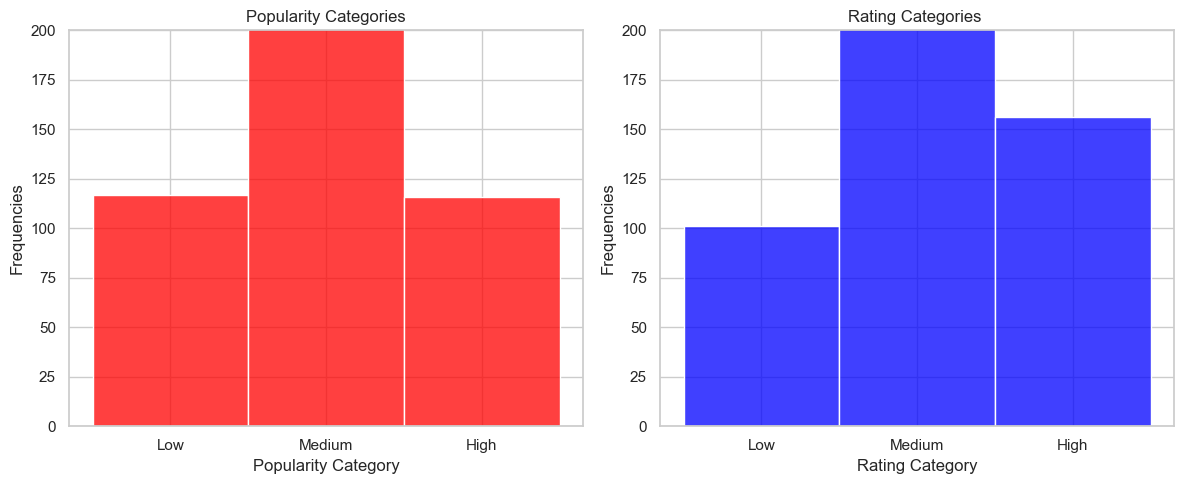

In [18]:
#2pts


# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a subplot matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Create a histogram for 'Popularity_Category' with color settings
sns.histplot(df, x='Popularity_Category', bins=30, color='red', ax=axs[0])  # Tomato color
axs[0].set_title('Popularity Categories')
axs[0].set_ylabel('Frequencies')
axs[0].set_xlabel('Popularity Category')
axs[0].set_ylim(0, 200)

# Create a histogram for 'Rating_Category' with color settings
sns.histplot(df, x='Owner_rating_category', bins=30, color='blue', ax=axs[1])  # SteelBlue color
axs[1].set_title('Rating Categories ')
axs[1].set_ylabel('Frequencies')
axs[1].set_xlabel('Rating Category')
axs[1].set_ylim(0, 200)

# Adjust layout for a better arrangement
plt.tight_layout()

# Show the plots
plt.show()



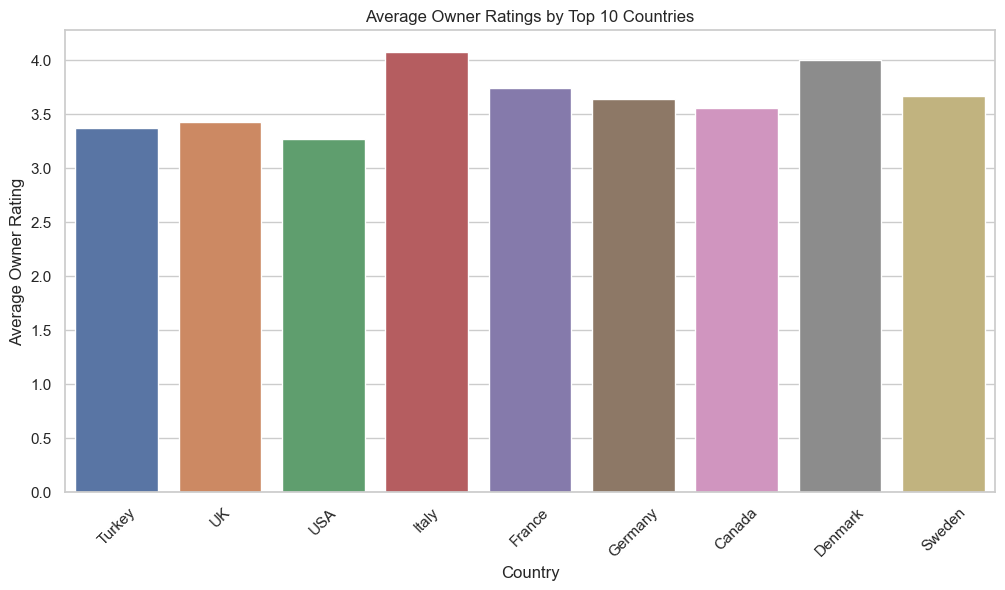

In [19]:
# Create a list to store countries and their average owner ratings
country_avg_ratings = []

# Split the genres in the filtered DataFrame and create a list of all genres
for index, row in df.iterrows():
    countries = [country.strip("[]").strip().strip("'") for country in row['Countries'].split(',')]
    for c in countries:
        data_dict = {'Country': c, 'Owner_rating': pd.to_numeric(row['Owner_rating'], errors='coerce')}
        country_avg_ratings.append(data_dict)

# Create a DataFrame from the list
country_avg_ratings_df = pd.DataFrame(country_avg_ratings)

# Count the occurrences of each country
country_counts = country_avg_ratings_df['Country'].value_counts()

# Get the top 10 most common countries
top_countries = country_counts[country_counts > 10].index

# Filter the DataFrame to include only rows with one of the top 10 countries
top_countries_df = country_avg_ratings_df[country_avg_ratings_df['Country'].isin(top_countries)]

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Owner_rating', data=top_countries_df, errorbar=None)
plt.title('Average Owner Ratings by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Owner Rating')
plt.xticks(rotation=45)
plt.show()

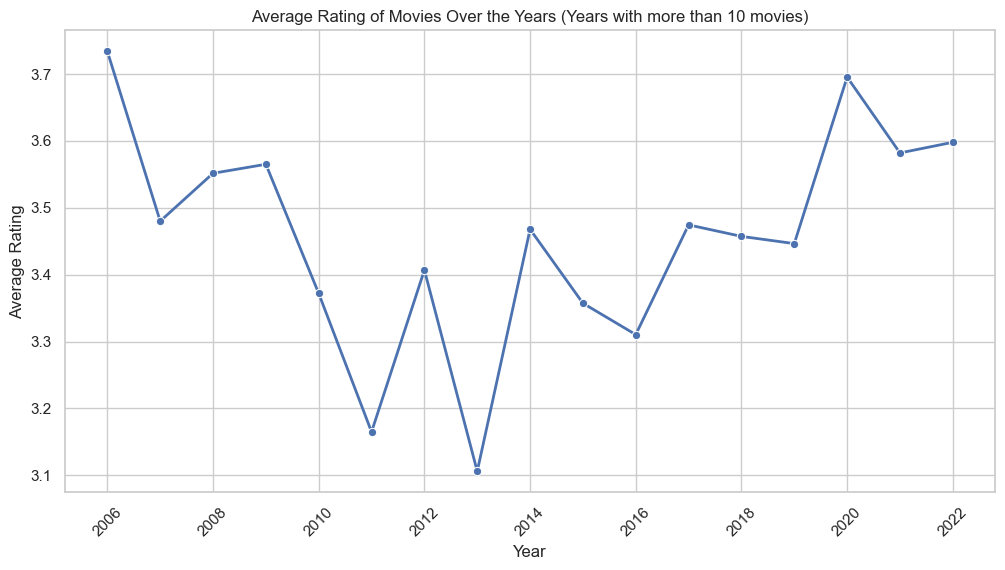

In [20]:

# Group by year and count the number of movies in each year
movie_counts_by_year = df['Release_year'].value_counts()

# Extract years with more than 10 movies
years_with_more_than_10_movies = movie_counts_by_year[movie_counts_by_year > 10].index

# Filter the DataFrame for years with more than 10 movies
df_filtered = df[df['Release_year'].isin(years_with_more_than_10_movies)]

# Group by year and calculate the average popularity
average_popularity_by_year = df_filtered.groupby('Release_year')['Average_rating'].mean().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Line plot using Seaborn with thicker line
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release_year', y='Average_rating', data=average_popularity_by_year, marker='o', linewidth=2)
plt.title('Average Rating of Movies Over the Years (Years with more than 10 movies)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x tick values by 45 degrees



plt.show()



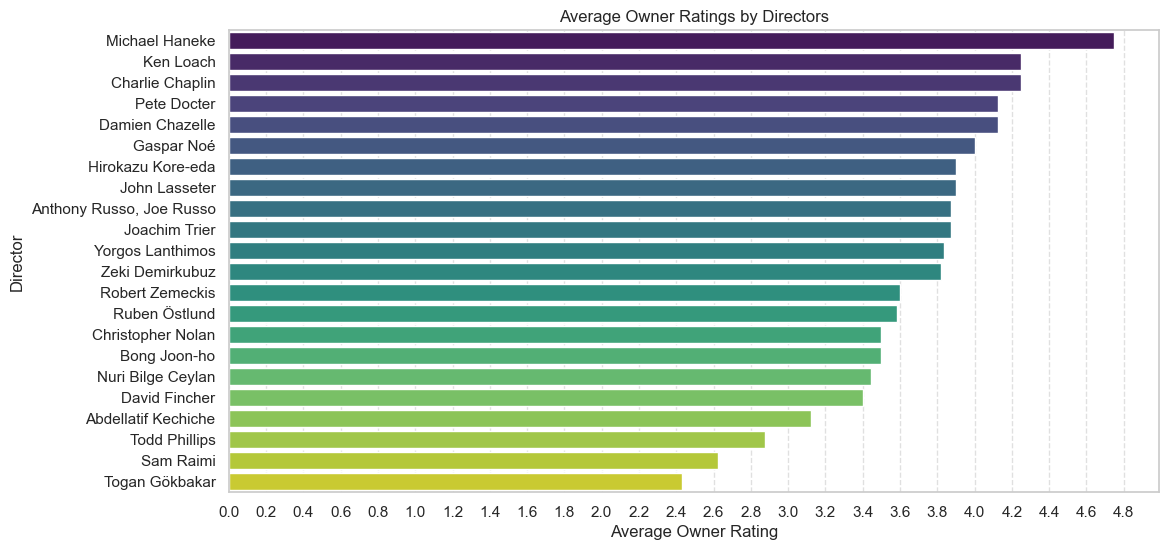

In [21]:
# Create a list to store directors and their average owner ratings
director_avg_ratings = []

for index, row in df.iterrows():
    director = row['Director']
    data_dict = {'Director': director, 'Owner_rating': pd.to_numeric(row['Owner_rating'], errors='coerce')}
    director_avg_ratings.append(data_dict)

# Create a DataFrame from the list
director_avg_ratings_df = pd.DataFrame(director_avg_ratings)

# Count the occurrences of each director
director_counts = director_avg_ratings_df['Director'].value_counts()

# Get directors with more than 4 occurrences
top_directors = director_counts[director_counts >= 4].index

# Filter the DataFrame to include only rows with directors in top_directors
filtered_directors_df = director_avg_ratings_df[director_avg_ratings_df['Director'].isin(top_directors)]

# Group by director and calculate the mean of Owner_rating
director_mean_ratings_df = filtered_directors_df.groupby('Director')['Owner_rating'].mean().reset_index()

# Sort the DataFrame by Owner_rating in descending order
director_mean_ratings_df = director_mean_ratings_df.sort_values(by='Owner_rating', ascending=False)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
# Create a bar plot using Seaborn with grid lines on the x-axis
sns.barplot(x='Owner_rating', y='Director', data=director_mean_ratings_df, palette='viridis')
plt.title('Average Owner Ratings by Directors')  # Set the title of the plot
plt.xlabel('Average Owner Rating')  # Set the x-axis label
plt.ylabel('Director')  # Set the y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid lines to the x-axis

# Set x-axis ticks with more granularity (every 0.1)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.2))

plt.show()  # Display the plot




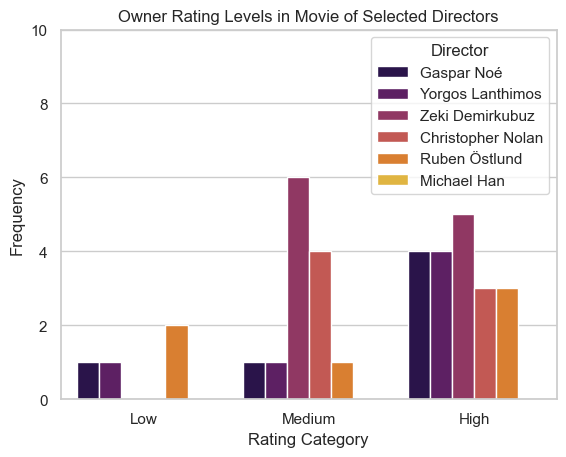

In [22]:



# Desired order of directors
selected_directors = ['Gaspar Noé', 'Yorgos Lanthimos','Zeki Demirkubuz','Christopher Nolan','Ruben Östlund','Michael Han']

# Filter the data for the selected directors
filtered_df = df[df['Director'].isin(selected_directors)]

# Define the order of Rating categories
rating_order = ['Low', 'Medium', 'High']

# Set up the color palette
palette = sns.color_palette("inferno", len(selected_directors))



# Create the countplot
sns.countplot(x='Owner_rating_category', hue='Director', data=filtered_df, order=rating_order, hue_order=selected_directors, palette=palette)

# Set plot labels and title
plt.xlabel('Rating Category')
plt.ylabel('Frequency')
plt.title('Owner Rating Levels in Movie of Selected Directors')

# Set y-axis limits for better clarity
plt.ylim(0, 10)

# Show the legend
plt.legend(title='Director')

# Display the plot
plt.show()


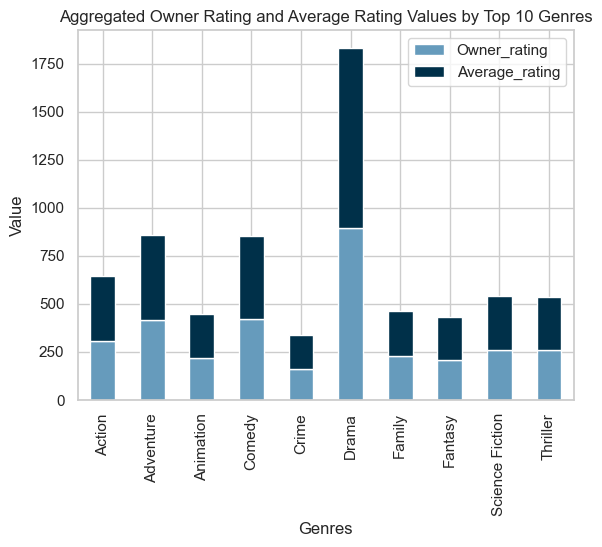

In [23]:

# Get the top 10 most common genres
top_genres = genre_counts.nlargest(10).index

# Filter the DataFrame to include only rows with one of the top 10 genres
top_genres_df = genres_popularity_df[genres_popularity_df['Genre'].isin(top_genres)].copy()

# Group by genre and calculate the sum of Owner_rating and Average_rating values
genre_energy_acoustic_sum = top_genres_df.groupby('Genre')[['Owner_rating', 'Average_rating']].sum()

# Create a stacked bar chart
genre_energy_acoustic_sum.plot(kind='bar', stacked=True, color=['#669bbc', '#003049'])
plt.title('Aggregated Owner Rating and Average Rating Values by Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()




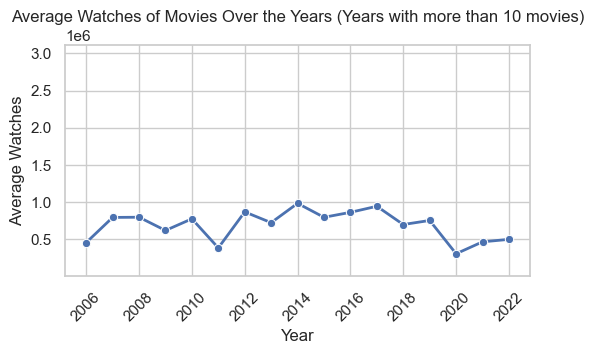

In [24]:



# Group by year and count the number of movies in each year
movie_counts_by_year = df['Release_year'].value_counts()

# Extract years with more than 10 movies
years_with_more_than_10_movies = movie_counts_by_year[movie_counts_by_year > 10].index

# Filter the DataFrame for years with more than 10 movies
df_filtered = df[df['Release_year'].isin(years_with_more_than_10_movies)]

# Group by year and calculate the average popularity
average_popularity_by_year = df_filtered.groupby('Release_year')['Watches'].mean().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Line plot using Seaborn with thicker line
plt.figure(figsize=(6, 3))
sns.lineplot(x='Release_year', y='Watches', data=average_popularity_by_year, marker='o', linewidth=2)
plt.title('Average Watches of Movies Over the Years (Years with more than 10 movies)')
plt.xlabel('Year')
plt.ylabel('Average Watches')
plt.xticks(rotation=45)  # Rotate x tick values by 45 degrees

# Set y-limits
min_popularity = df_filtered['Watches'].min() - 5
max_popularity = df_filtered['Watches'].max() + 5
plt.ylim(min_popularity, max_popularity)

plt.show()


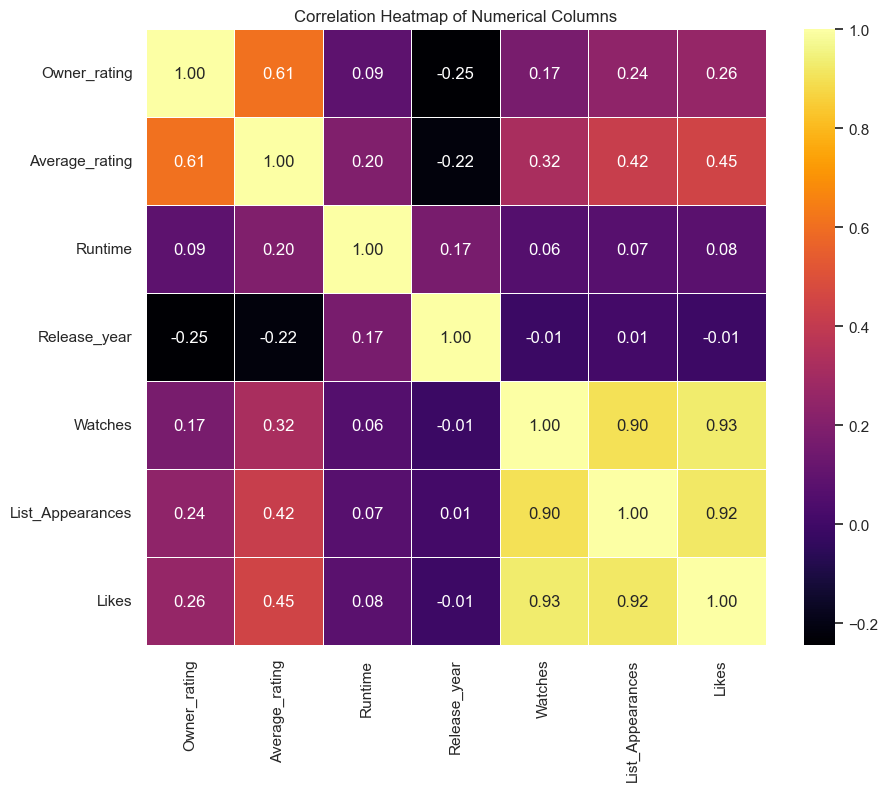

In [25]:

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()



# Hypothesis Testing and Machine Learning

In [26]:
from scipy.stats import ttest_ind

# Eksik değerlere sahip satırları düşür
df.dropna(subset=['Owner_rating'], inplace=True)

# Oscar adayı filmleri ve diğer filmleri ayırın
oscar_films = df[df['Oscar_nominee'] == 'Yes']
cannes_films = df[df['Cannes_nominee'] == 'Yes']

# T-testi gerçekleştirin
statistic, p_value = ttest_ind(oscar_films['Owner_rating'], cannes_films['Owner_rating'], equal_var=False)

# Anlamlılık düzeyini belirleyin (genellikle 0.05 kullanılır)
alpha = 0.05

# P değerini kontrol edin ve hipotezi test edin
if p_value < alpha:
    print(f" (p-value = {p_value:.4f}).")
else:
    print(f" (p-value = {p_value:.4f}).")





 (p-value = 0.0245).


## Hypotheses:

**Null Hypothesis (H0):** There is no statistically significant difference in Owner_ratings between Oscar-nominated films and Cannes-nominated films.
**Alternative Hypothesis (H1):** There is a statistically significant difference in Owner_ratings between Oscar-nominated films and Cannes-nominated films.

## Test Result:

**p-value:** 0.0245
The significance level (alpha) is typically set at 0.05.

## Results:

According to the test result, the p-value (0.0245) is less than the significance level (alpha = 0.05).
Therefore, we reject the Null Hypothesis (H0).

## Implications:
There is statistically significant evidence that there is a difference in Owner_ratings between Oscar-nominated films and Cannes-nominated films.
In other words, there is significant evidence suggesting a difference in Owner_ratings between these two groups.

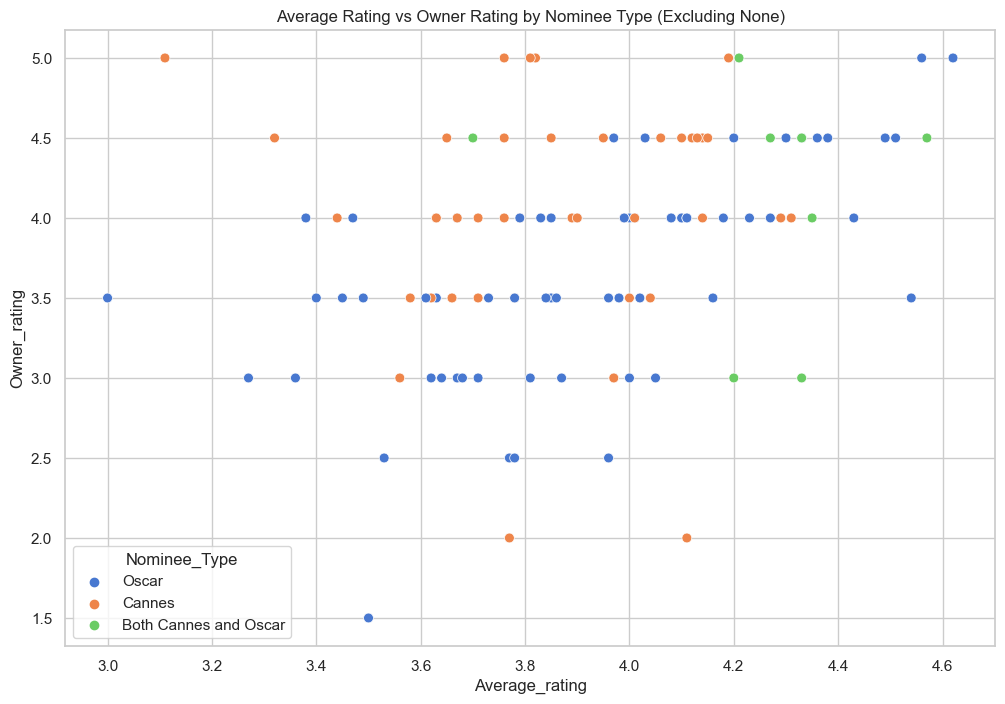

In [27]:
plt.figure(figsize=(12, 8))

# Filter the DataFrame to exclude rows where Nominee_Type is None
filtered_df = df[df['Nominee_Type'] != 'None']

# Scatter plot between "Average_rating" and "Likes" with contrasting colors and reduced transparency
sns.scatterplot(x='Average_rating', y='Owner_rating', data=filtered_df, hue='Nominee_Type', palette='muted', s=50, edgecolor='w', linewidth=0.5)
plt.title('Average Rating vs Owner Rating by Nominee Type (Excluding None)')
plt.show()


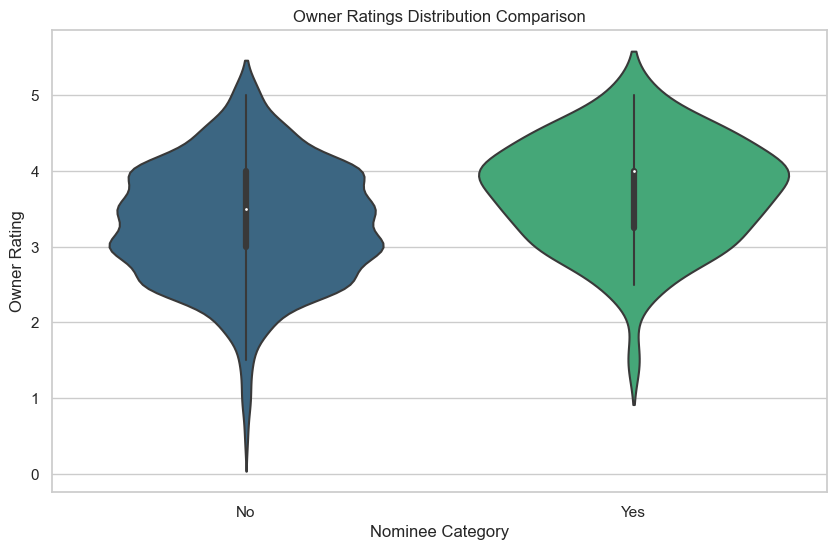

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Oscar_nominee', y='Owner_rating', data=df, palette='viridis')
plt.title('Owner Ratings Distribution Comparison')
plt.xlabel('Nominee Category')
plt.ylabel('Owner Rating')
plt.show()


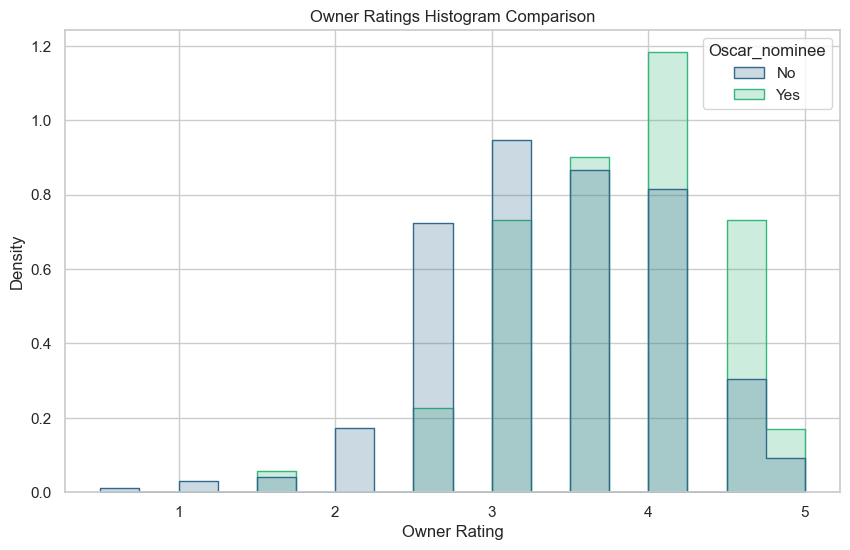

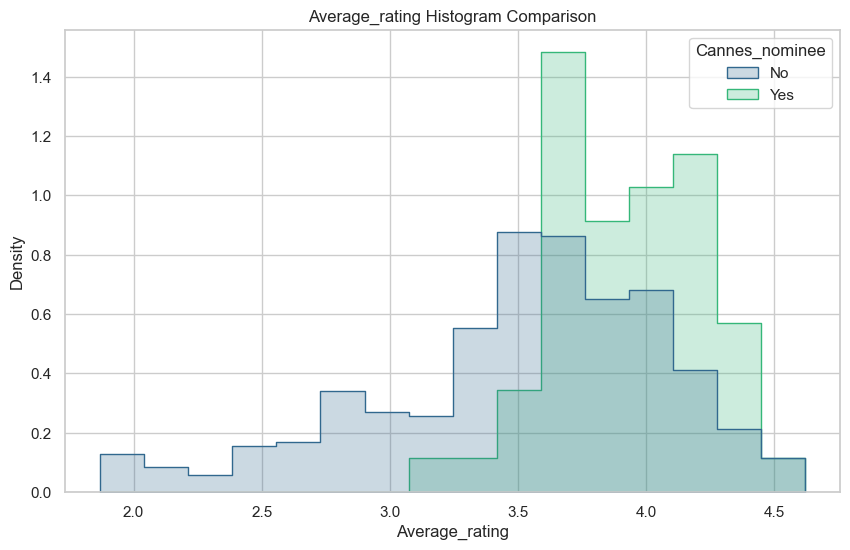

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Owner_rating', hue='Oscar_nominee', element='step', stat='density', common_norm=False, palette='viridis')
plt.title('Owner Ratings Histogram Comparison')
plt.xlabel('Owner Rating')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Average_rating', hue='Cannes_nominee', element='step', stat='density', common_norm=False, palette='viridis')
plt.title('Average_rating Histogram Comparison')
plt.xlabel('Average_rating')
plt.ylabel('Density')
plt.show()


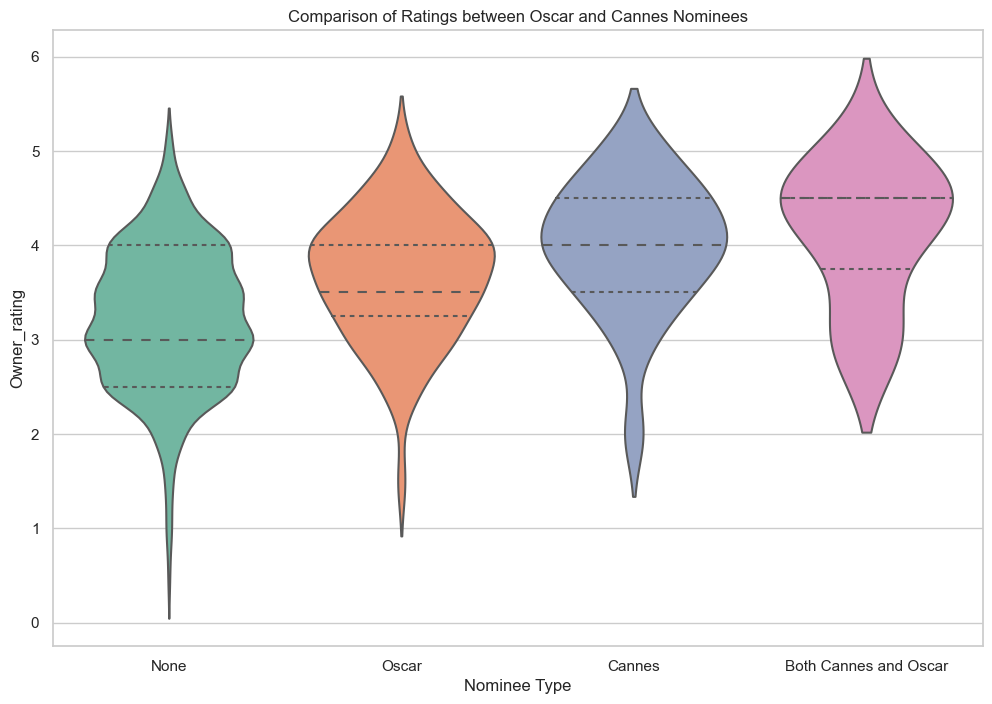

In [30]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Nominee_Type', y='Owner_rating', data=df, palette='Set2', inner='quartile')
plt.title('Comparison of Ratings between Oscar and Cannes Nominees')
plt.xlabel('Nominee Type')
plt.ylabel('Owner_rating')
plt.show()


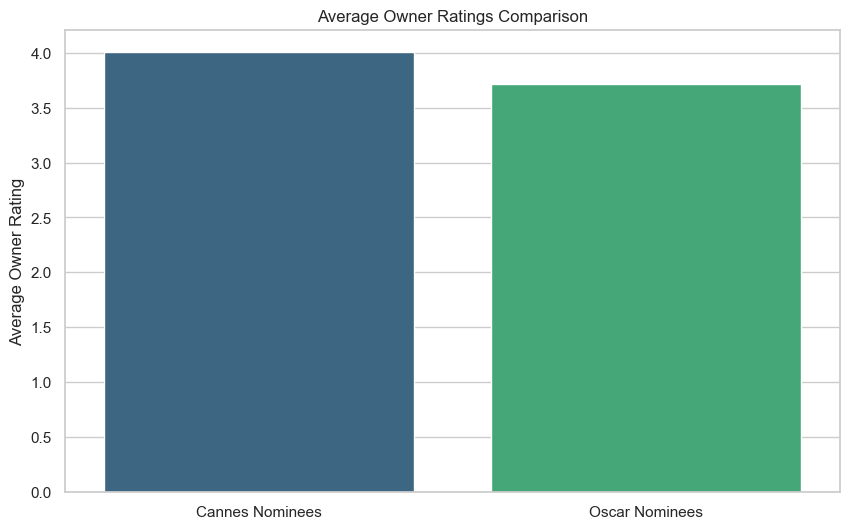

In [31]:
# Set the style for better visualization (optional)
sns.set(style="whitegrid")

# Filter DataFrame for Cannes nominees
cannes_nominees_df = df[df['Cannes_nominee'] == 'Yes']

# Filter DataFrame for Oscar nominees
oscar_nominees_df = df[df['Oscar_nominee'] == 'Yes']

# Calculate average owner ratings
avg_owner_rating_cannes = cannes_nominees_df['Owner_rating'].mean()
avg_owner_rating_oscar = oscar_nominees_df['Owner_rating'].mean()

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['Cannes Nominees', 'Oscar Nominees'], y=[avg_owner_rating_cannes, avg_owner_rating_oscar], palette='viridis')
plt.title('Average Owner Ratings Comparison')
plt.ylabel('Average Owner Rating')
plt.show()

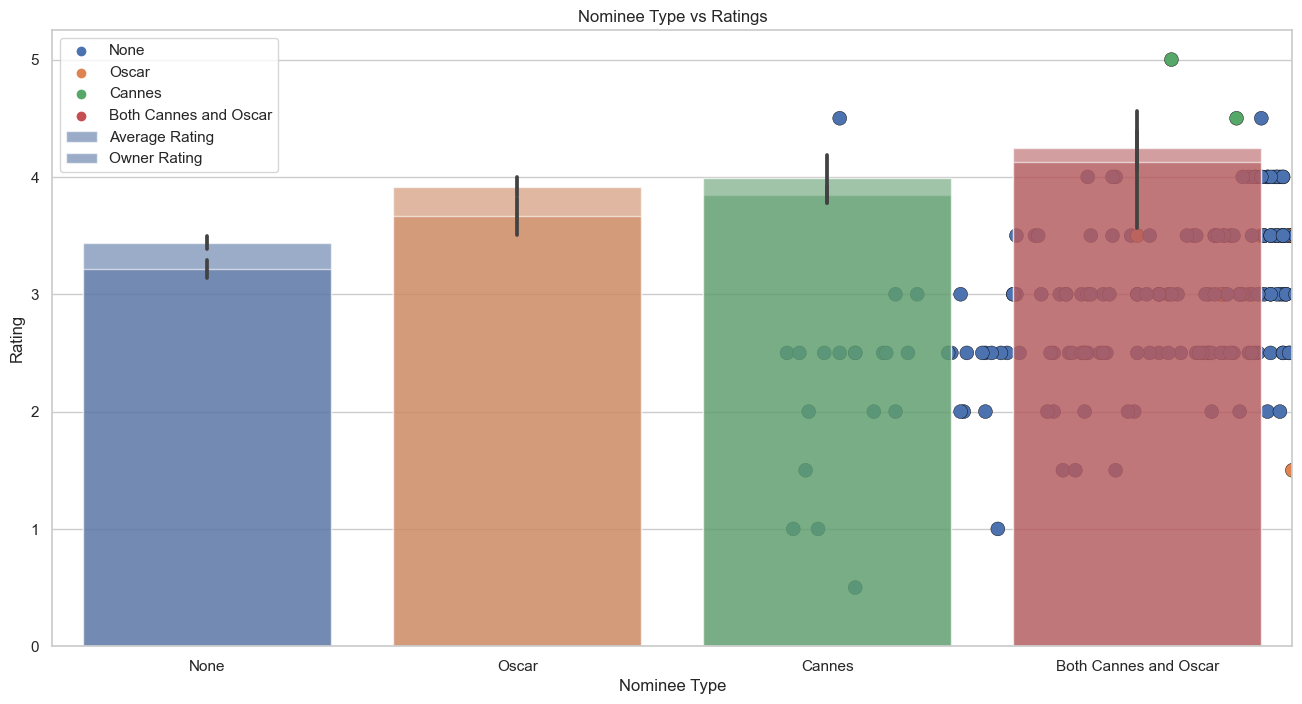

In [32]:
plt.figure(figsize=(16, 8))

# Scatterplot for individual ratings
sns.scatterplot(x='Average_rating', y='Owner_rating', hue='Nominee_Type', data=df,  s=100, edgecolor='black', linewidth=0.3, alpha=1.0)

# Bar Plot for average ratings by Nominee Type
sns.barplot(x='Nominee_Type', y='Average_rating', data=df, alpha=0.6, label='Average Rating')
sns.barplot(x='Nominee_Type', y='Owner_rating', data=df, alpha=0.6, label='Owner Rating')

plt.title('Nominee Type vs Ratings')
plt.xlabel('Nominee Type')
plt.ylabel('Rating')
plt.legend()

plt.show()


<Figure size 1200x600 with 0 Axes>

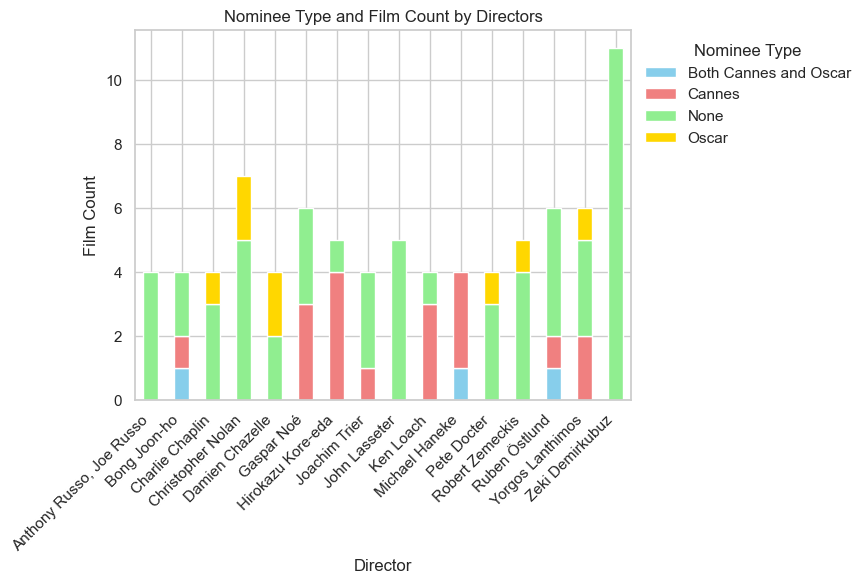

In [33]:
# Filter the DataFrame to include only rows with Owner_rating >= .5
high_owner_ratings_df = director_mean_ratings_df[director_mean_ratings_df['Owner_rating'] >= 3.5]

directors_list = high_owner_ratings_df['Director'].unique().tolist()

# Filter the DataFrame to include only rows with directors in top_directors
filtered_directors_df = df[df['Director'].isin(directors_list)]

# Her bir yönetmen için Nominee_Type ve film sayısını içeren bir DataFrame oluştur
director_counts_df = filtered_directors_df.groupby(['Director', 'Nominee_Type']).size().reset_index(name='Film_Count')

# Pivot tablo oluştur
pivot_table = director_counts_df.pivot_table(index='Director', columns='Nominee_Type', values='Film_Count', fill_value=0)

# Stacked bar chart oluştur
plt.figure(figsize=(12, 6))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
ax = pivot_table.plot(kind='bar', stacked=True, color=colors, edgecolor='w', linewidth=1)
plt.title('Nominee Type and Film Count by Directors')
plt.xlabel('Director')
plt.ylabel('Film Count')
plt.xticks(rotation=45, ha='right')  # X ekseni etiketlerini sağa döndür
plt.legend(title='Nominee Type', bbox_to_anchor=(1, 1), loc='upper left', frameon=False)  # Legendı ekleyerek konumunu ayarla ve arka plan karesini kaldır
plt.show()


# Machine Learning to Support My Hypthesis

In [34]:
# df_oscar'daki tüm Owner Rating değerlerini sil
df_oscar['Owner_rating'] = None

# df ve df_oscar DataFrame'lerini gezerek eşleşen filmlerin satırlarını güncelle
for index, row in df.iterrows():
    film_title = row['Film_title']
    release_year = row['Release_year']
    
    # df_oscar'da aynı filmi ve yılı bul
    matching_rows = df_oscar[(df_oscar['Film_title'] == film_title) & (df_oscar['Release_year'] == release_year)]
    
    # Eğer eşleşen bir film bulunduysa, df_oscar'daki satırı df'deki satırla güncelle
    if not matching_rows.empty:
        matching_index = matching_rows.index[0]
        df_oscar.loc[matching_index] = row

# df_cannes'deki tüm Owner Rating değerlerini sil
df_cannes['Owner_rating'] = None

# df ve df_cannes DataFrame'lerini gezerek eşleşen filmlerin satırlarını güncelle
for index, row in df.iterrows():
    film_title = row['Film_title']
    release_year = row['Release_year']
    
    # df_cannes'da aynı filmi ve yılı bul
    matching_rows = df_cannes[(df_cannes['Film_title'] == film_title) & (df_cannes['Release_year'] == release_year)]
    
    # Eğer eşleşen bir film bulunduysa, df_cannes'daki satırı df'deki satırla güncelle
    if not matching_rows.empty:
        matching_index = matching_rows.index[0]
        df_cannes.loc[matching_index] = row


df_cannes['Owner_rating_category'] = np.where(df_cannes['Owner_rating'].eq('None') | df_cannes['Owner_rating'].isnull(), np.nan, pd.cut(df_cannes['Owner_rating'].astype(float), bins=[float('-inf'), 2.5, 3.5, float('inf')], labels=['Low', 'Medium', 'High']))

df_oscar['Owner_rating_category'] = np.where(df_oscar['Owner_rating'].eq('None') | df_oscar['Owner_rating'].isnull(), np.nan, pd.cut(df_oscar['Owner_rating'].astype(float), bins=[float('-inf'), 2.5, 3.5, float('inf')], labels=['Low', 'Medium', 'High']))

# 2000 yılından önceki filmleri sil
df_oscar_1980 = df_oscar[df_oscar['Release_year'] >= 1980]
df_cannes_2010 = df_cannes[df_cannes['Release_year'] >= 2010]




In [35]:
# df'in bir kopyasını oluşturalım (df'i değiştirmemek için)
df_encoded_cannes = df_cannes_2010.copy()

# 'Genres' sütunundaki her bir türü ayırmak için virgül (',') kullanarak böl
df_encoded_cannes['First_Genre'] = df_encoded_cannes['Genres'].str.split(',').str[0]

# 'Genres' sütunundaki ilk türü koruyarak diğer türleri silebilirsiniz
df_encoded_cannes['Genres'] = df_encoded_cannes['First_Genre']

# 'First_Genre' sütununu artık kullanmadığımız için silebiliriz
df_encoded_cannes = df_encoded_cannes.drop('First_Genre', axis=1)
# 'Genres' sütunundaki tek tırnakları (') ve köşeli parantezleri ([]) kaldır
df_encoded_cannes['Genres'] = df_encoded_cannes['Genres'].str.replace("'", "").str.replace("[", "").str.replace("]", "")

# 'Countries' sütunundaki her bir ülkeyi ayırmak için virgül (',') kullanarak böl
df_encoded_cannes['First_Country'] = df_encoded_cannes['Countries'].str.split(',').str[0]

# 'Countries' sütunundaki ilk ülkeyi koruyarak diğer ülkeleri silebilirsiniz
df_encoded_cannes['Countries'] = df_encoded_cannes['First_Country']

# 'First_Country' sütununu artık kullanmadığımız için silebiliriz
df_encoded_cannes = df_encoded_cannes.drop('First_Country', axis=1)
# 'Countries' sütunundaki tek tırnakları (') ve köşeli parantezleri ([]) kaldır
df_encoded_cannes['Countries'] = df_encoded_cannes['Countries'].str.replace("'", "").str.replace("[", "").str.replace("]", "")


# df'in bir kopyasını oluşturalım (df'i değiştirmemek için)
df_encoded_oscar = df_oscar_1980.copy()

# 'Genres' sütunundaki her bir türü ayırmak için virgül (',') kullanarak böl
df_encoded_oscar['First_Genre'] = df_encoded_oscar['Genres'].str.split(',').str[0]

# 'Genres' sütunundaki ilk türü koruyarak diğer türleri silebilirsiniz
df_encoded_oscar['Genres'] = df_encoded_oscar['First_Genre']

# 'First_Genre' sütununu artık kullanmadığımız için silebiliriz
df_encoded_oscar = df_encoded_oscar.drop('First_Genre', axis=1)
# 'Genres' sütunundaki tek tırnakları (') ve köşeli parantezleri ([]) kaldır
df_encoded_oscar['Genres'] = df_encoded_oscar['Genres'].str.replace("'", "").str.replace("[", "").str.replace("]", "")

# 'Countries' sütunundaki her bir ülkeyi ayırmak için virgül (',') kullanarak böl
df_encoded_oscar['First_Country'] = df_encoded_oscar['Countries'].str.split(',').str[0]

# 'Countries' sütunundaki ilk ülkeyi koruyarak diğer ülkeleri silebilirsiniz
df_encoded_oscar['Countries'] = df_encoded_oscar['First_Country']

# 'First_Country' sütununu artık kullanmadığımız için silebiliriz
df_encoded_oscar = df_encoded_oscar.drop('First_Country', axis=1)
# 'Countries' sütunundaki tek tırnakları (') ve köşeli parantezleri ([]) kaldır
df_encoded_oscar['Countries'] = df_encoded_oscar['Countries'].str.replace("'", "").str.replace("[", "").str.replace("]", "")










In [36]:
# 'Genres' sütunundaki değerlere göre kodlama yapacak bir harita oluştur
# 'Countries' sütunundaki değerlere göre kodlama yapacak bir harita oluştur
country_mapping = {
    'USA': 1,
    'Turkey': 2,
    'France': 3,
    'UK': 4,
    'Canada': 5,
    'Germany': 6,
    'Belgium': 7,
    'Denmark': 8,
    'Japan': 9,
    'South Korea': 10,
    'Australia': 11,
    'Greece': 11,
    'Austria': 11,
    'India': 11,
    'Sweden': 11,
    'Italy': 11,
    'New Zealand': 11,
    'China': 11,
    'Ireland': 11,
    'Spain': 11,
    'Hong Kong': 11,
    'Croatia': 11,
    'Bosnia and Herzegovina': 11,
    'Mexico': 11,
    'Argentina': 11,
    'Czechia': 11,
    'Tunisia': 11,
    'Cyprus': 11,
    'Norway': 11,
    'Chile': 11,
    'Malawi': 11,
    'Taiwan': 11,
    'Poland': 11,
    'Estonia': 11,
    'Finland': 11,
    'Romania': 11,
    'Netherlands': 11
}
genre_mapping = {
    'Drama': 1,
    'Comedy': 2,
    'Action': 3,
    'Adventure': 4,
    'Science Fiction': 5,
    'Thriller': 6,
    'Fantasy': 7,
    'Animation': 8,
    'Crime': 9,
    'Family': 10,
    'History': 11,
    'Romance': 12,
    'Mystery': 13,
    'Documentary': 13,
    'War': 13,
    'Horror': 13,
    'Music': 13,
    'Western': 13,
    'TV Movie': 13
}


# 'Original_Language' sütunundaki değerlere göre kodlama yapacak bir harita oluştur
original_language_mapping = {
    'English': 1,
    'Turkish': 2,
    'French': 3,
    'Spanish': 4,
    'Korean': 5,
    'Swedish': 6,
    'Japanese': 7,
    'Norwegian': 8,
    'German': 9,
    'Danish': 10,
    'Greek (modern)': 10,
    'Romanian': 10,
    'Polish': 10,
    'Hindi': 10,
    'Galician': 10,
    'Persian (Farsi)': 10,
    'Italian': 10,
    'Finnish': 10,
    'Chinese': 10,
    'Arabic': 10,
    'Kurdish': 10,
    'Serbo-Croatian': 10
}


owner_rating_category_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}



df_encoded_cannes['Genres'] = df_encoded_cannes['Genres'].map(genre_mapping)
df_encoded_cannes['Countries'] = df_encoded_cannes['Countries'].map(country_mapping)
df_encoded_cannes['Original_Language'] = df_encoded_cannes['Original_Language'].map(original_language_mapping)
df_encoded_cannes['Owner_rating_category'] = df_encoded_cannes['Owner_rating_category'].map(owner_rating_category_mapping)

df_encoded_oscar['Genres'] = df_encoded_oscar['Genres'].map(genre_mapping)
df_encoded_oscar['Countries'] = df_encoded_oscar['Countries'].map(country_mapping)
df_encoded_oscar['Original_Language'] = df_encoded_oscar['Original_Language'].map(original_language_mapping)
df_encoded_oscar['Owner_rating_category'] = df_encoded_oscar['Owner_rating_category'].map(owner_rating_category_mapping)

df_encoded_oscar_numeric = df_encoded_oscar[['Release_year','Genres' ,'Average_rating', 'Runtime', 'Countries', 'Original_Language', 'Watches', 'List_Appearances', 'Likes','Owner_rating_category']]
df_encoded_cannes_numeric = df_encoded_cannes[['Release_year','Genres' ,'Average_rating', 'Runtime', 'Countries', 'Original_Language', 'Watches', 'List_Appearances', 'Likes','Owner_rating_category']]

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

def fill_missing_values(df, target_column):
    # Eksik değerleri içermeyen bir alt küme oluşturun
    df_no_nan = df.dropna(subset=[target_column])

    # Hedef değişken (Target Variable)
    y = df_no_nan[target_column]

    # Bağımsız değişkenler (Independent Variables)
    X = df_no_nan.drop([target_column], axis=1)

    # Eğitim ve test setlerini oluşturun
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modeli eğitin
    model = RandomForestRegressor()
    model.fit(X_train, y_train)


    # Eğitilen modeli kullanarak NaN değerleri doldurun
    imputer = SimpleImputer(strategy='mean')  # ya da başka bir strateji seçebilirsiniz
    df_filled = df.copy()
    df_filled[target_column] = model.predict(imputer.fit_transform(df_filled.drop([target_column], axis=1)))
    df_filled[target_column] = df_filled[target_column].round().astype(int)

    return df_filled

# Oscar veri kümesi üzerinde işlem yapın
df_filled_oscar = fill_missing_values(df_encoded_oscar_numeric, 'Owner_rating_category')

# Cannes veri kümesi üzerinde işlem yapın
df_filled_cannes = fill_missing_values(df_encoded_cannes_numeric, 'Owner_rating_category')


/Users/mesely/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/mesely/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [38]:

# 'Owner_rating_category' sütunları üzerinden iki veri kümesini seçin
ratings_oscar = df_filled_oscar['Owner_rating_category']
ratings_cannes = df_filled_cannes['Owner_rating_category']

# İki örneklem t-testi yapın
t_stat, p_value = ttest_ind(ratings_oscar, ratings_cannes, equal_var=False)

# Anlamlılık düzeyini belirleyin (örneğin, 0.05)
alpha = 0.05

# P değerini kontrol edin
if p_value < alpha:
    print(f" {p_value})")
else:
    print(f" (p-value: {p_value})")


 1.8382431430709922e-50)




# Hypotheses on Machine Learning Data to Support My Main Hypthesis:

### Aim: df_filled_oscar and df_filled_cannes also contain my rating predictions for movies I haven't watched. If the rating predictions of these two data are different from each other, this is a factor that will support my hypothesis.

**Null Hypothesis (H0):** There is no significant difference between the movie rating predictions for the Oscar and Cannes datasets.

**Alternative Hypothesis (H1):** There is a significant difference between the movie rating predictions for the Oscar and Cannes datasets.

## Test Result:

**p-value:**  1.8382431430709922e-50

The significance level (alpha) is typically set at 0.05.

## Results:

The extremely low p-value is less than the significance level of 0.05. Therefore, we reject the null hypothesis.

## Implications:

The rejection of the null hypothesis suggests that there is a statistically significant difference between the movie rating predictions for the Oscar and Cannes datasets. This finding supports the hypothesis that the rating predictions of these two datasets are different from each other. Further investigation may be needed to understand the factors contributing to this difference and its implications.

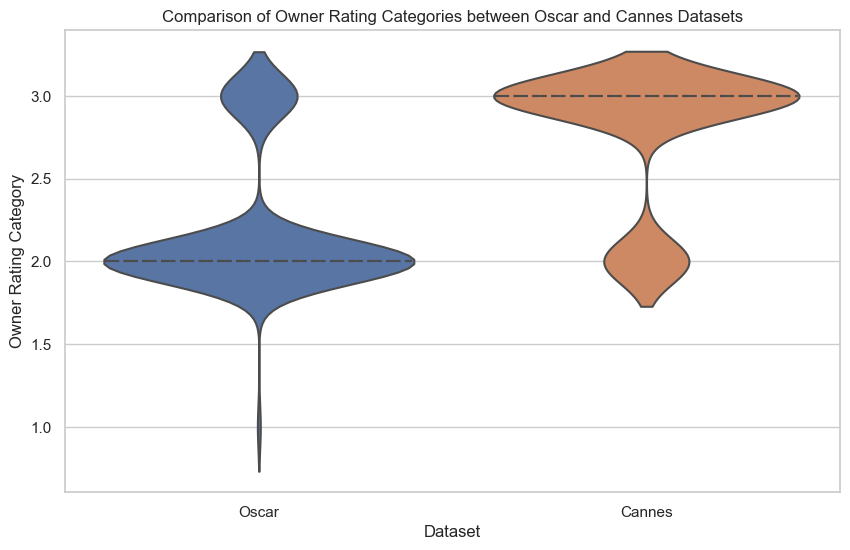

In [40]:
# Violin Plot (Kesikli Veri)

df_combined = pd.concat([df_filled_oscar, df_filled_cannes], keys=['Oscar', 'Cannes'])
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_combined.index.get_level_values(0), y='Owner_rating_category', data=df_combined, scale='count', inner='quartile')
plt.title('Comparison of Owner Rating Categories between Oscar and Cannes Datasets')
plt.xlabel('Dataset')
plt.ylabel('Owner Rating Category')
plt.show()
